# Predicción de enfermedades cardíacas mediante aprendizaje automático
Este cuaderno analiza el uso de varias bibliotecas de ciencia de datos y aprendizaje automático basadas en Python en un intento de construir un modelo de aprendizaje automático capaz de predecir si alguien tiene o no una enfermedad cardíaca en función de sus atributos médicos.

Vamos a adoptar el siguiente enfoque:
1. Definición del problema
2. Datos
3. Evaluación
4. Características
5. Modelado
6. Resumen

## 1. Definición del problema 

En una declaración: 
> Dados los parámetros clínicos de un paciente, ¿podemos predecir si tiene o no una enfermedad cardíaca?

## 2. Datos 

Los datos originales proceden de los datos de Cleavland desde UCI Machine Learning Repository.https://archive.ics.uci.edu/ml/datasets/heart+Disease

También hay una versión disponible en Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluación

> Si podemos alcanzar una precisión del 95% al predecir si un paciente tiene o no una enfermedad cardíaca durante la prueba de concepto, seguiremos adelante con el proyecto.

## 4. Características

Aquí obtendrá información diferente sobre cada una de las características de sus datos. Puede hacerlo investigando por su cuenta (por ejemplo, consultando los enlaces anteriores) o hablando con un experto en la materia (alguien que conozca el conjunto de datos).

**Crear diccionario de datos**
1. age - edad en años
2. sex - (1 = masculino; 0 = femenino)
3. cp - tipo de dolor en el pecho
    * 0: Angina típica: dolor en el pecho relacionado con una disminución del suministro de sangre al corazón
    * 1: Angina atípica: dolor en el pecho no relacionado con el corazón
    * 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
    * 3: Asintomático: dolor en el pecho que no muestra signos de enfermedad
4. trestbps - Presión arterial en reposo (en mm Hg al ingreso al hospital): cualquier valor superior a 130-140 suele ser motivo de preocupación.
5. chol - colesterol sérico en mg/dl
    * suero = LDL + HDL + .2 * triglicéridos
    * por encima de 200 es motivo de preocupación
6. fbs - (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
    * '>126' mg/dl indica diabetes
7. restecg - resultados electrocardiográficos en reposo
    * 0: Nada que destacar
    * 1: Anomalía de la onda ST-T
       * Puede variar desde síntomas leves hasta problemas graves
       * Indica un latido cardíaco anormal
    * 2: Hipertrofia ventricular izquierda posible o definitiva
       * Agrandamiento de la cámara de bombeo principal del corazón
8. thalach: frecuencia cardíaca máxima alcanzada
9. exang: angina inducida por el ejercicio (1 = sí; 0 = no)
10. oldpeak: depresión del segmento ST inducida por el ejercicio en relación con el reposo. Observa el estrés del corazón durante el ejercicio. Un corazón enfermo se estresará más.
11. slope: la pendiente del segmento ST del ejercicio máximo
    * 0: Pendiente ascendente: mejor frecuencia cardíaca con el ejercicio (poco común)
    * 1: Pendiente plana: cambio mínimo (corazón sano típico)
    * 2: Pendiente descendente: signos de corazón no sano
12. ca - número de vasos mayores (0-3) coloreados por fluorosopía
    * El color del vaso significa que el médico puede ver la sangre que pasa a través de él
    * Cuanto más sangre se mueva, mejor (sin coágulos)
13. thal - resultado de estrés de talio
    * 1,3: normal
    * 6: defecto corregido: solía ser un defecto pero ahora está bien
    * 7: defecto reversible: no hay movimiento sanguíneo adecuado al hacer ejercicio
14. target - tener enfermedad o no (1=sí, 0=no) (= el atributo previsto)

## Preparando las herramientas
Utilizaremos pandas, Matplotlib y NumPy para el análisis y manipulación de datos.

In [3]:
# Importar todas las herramientas que necesitamos 
# Bibliotecas de gráficos y análisis exploratorio de datos 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Modelos de Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluaciones de modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Cargar datos

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape # (filas, columnas)

(303, 14)

## Exploración de datos (análisis exploratorio de datos o EDA)

El objetivo aquí es descubrir más sobre los datos y convertirse en un tema de exportación del conjunto de datos con el que estás trabajando.

1. ¿Qué preguntas intentas resolver?
2. ¿Qué tipo de datos tenemos y cómo tratamos los diferentes tipos?
3. ¿Qué datos faltan y cómo lo gestionas?
4. ¿Dónde están los valores atípicos y por qué debería ser importarte?
5. ¿Cómo puedes añadir, modificar o eliminar características para sacar más provecho de los datos?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Vamos a averiguar cuántos de cada clase hay.
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

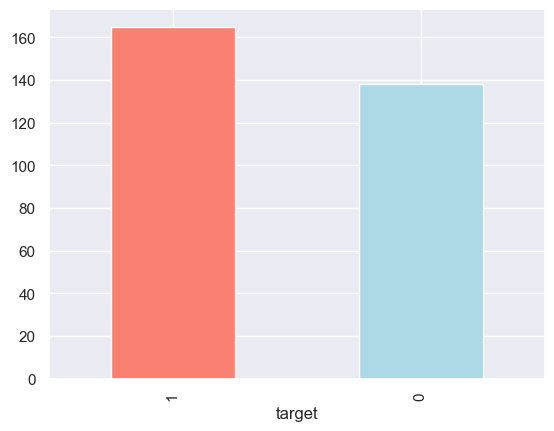

In [10]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#¿Faltan valores?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frecuencia de enfermedades cardíacas según el sexo

In [15]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
# Comparar la columna de destino con la columna de sexo
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


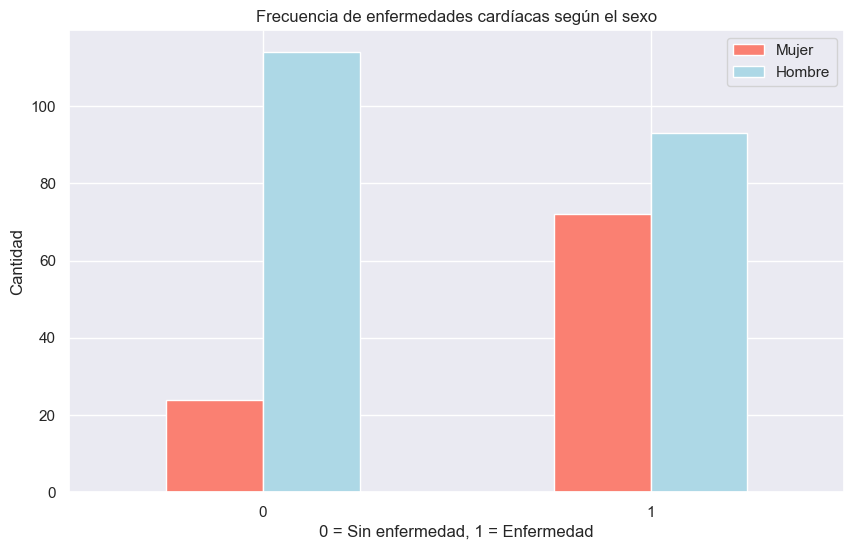

In [17]:
# Crear un gráfico de tabla cruzada
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Frecuencia de enfermedades cardíacas según el sexo")
plt.xlabel("0 = Sin enfermedad, 1 = Enfermedad")
plt.ylabel("Cantidad")
plt.legend(["Mujer", "Hombre"]);
plt.xticks(rotation=0);

### Edad vs. frecuencia cardíaca máxima en enfermedades cardíacas

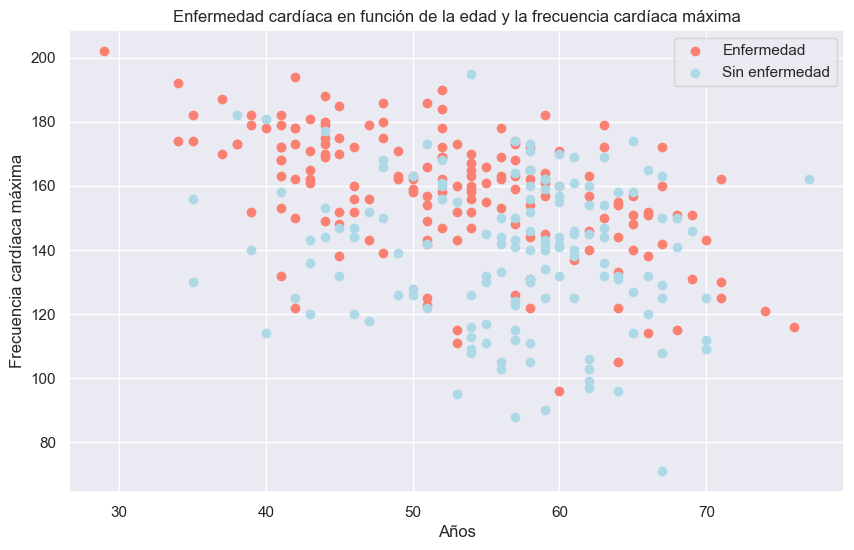

In [19]:
# Creamos otra figura
plt.figure(figsize=(10, 6))

# Dispersión con ejemplos positivos
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Dispersión con ejemplos negativos
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Añado información útil
plt.title("Enfermedad cardíaca en función de la edad y la frecuencia cardíaca máxima")
plt.xlabel("Años")
plt.ylabel("Frecuencia cardíaca máxima")
plt.legend(["Enfermedad", "Sin enfermedad"]);

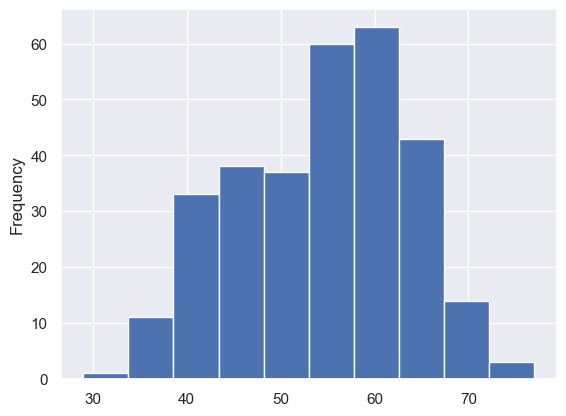

In [20]:
# Verifique la distribución de la columna de edad con un histograma
df.age.plot.hist();

### Frecuencia de enfermedades cardíacas por tipo de dolor en el pecho
3. cp - tipo de dolor en el pecho
    * 0: Angina típica: dolor en el pecho relacionado con una disminución del suministro de sangre al corazón
    * 1: Angina atípica: dolor en el pecho no relacionado con el corazón
    * 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
    * 3: Asintomático: dolor en el pecho que no muestra signos de enfermedad

In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


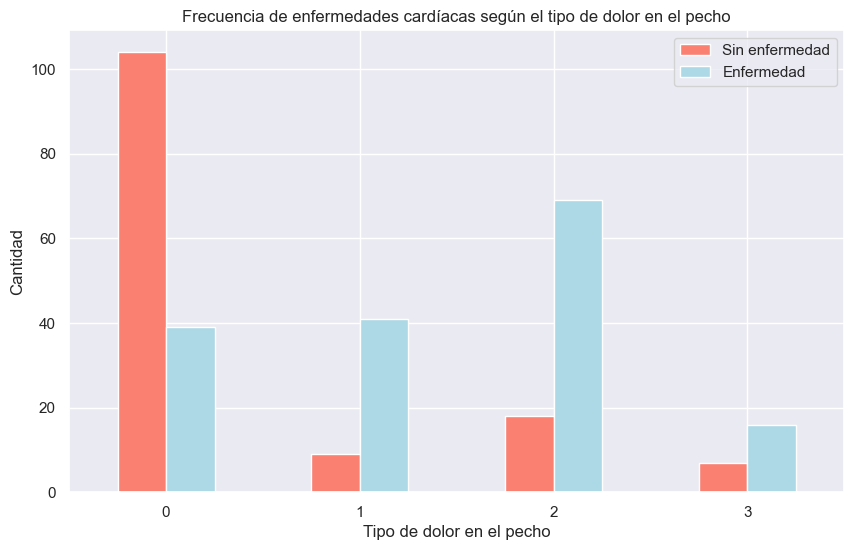

In [23]:
# Hacer que la tabla cruzada para que sea más visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
#Añadir algo de información
plt.title("Frecuencia de enfermedades cardíacas según el tipo de dolor en el pecho")
plt.xlabel("Tipo de dolor en el pecho")
plt.ylabel("Cantidad")
plt.legend(["Sin enfermedad", "Enfermedad"])
plt.xticks(rotation=0);

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Hacer una matriz de correlación
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


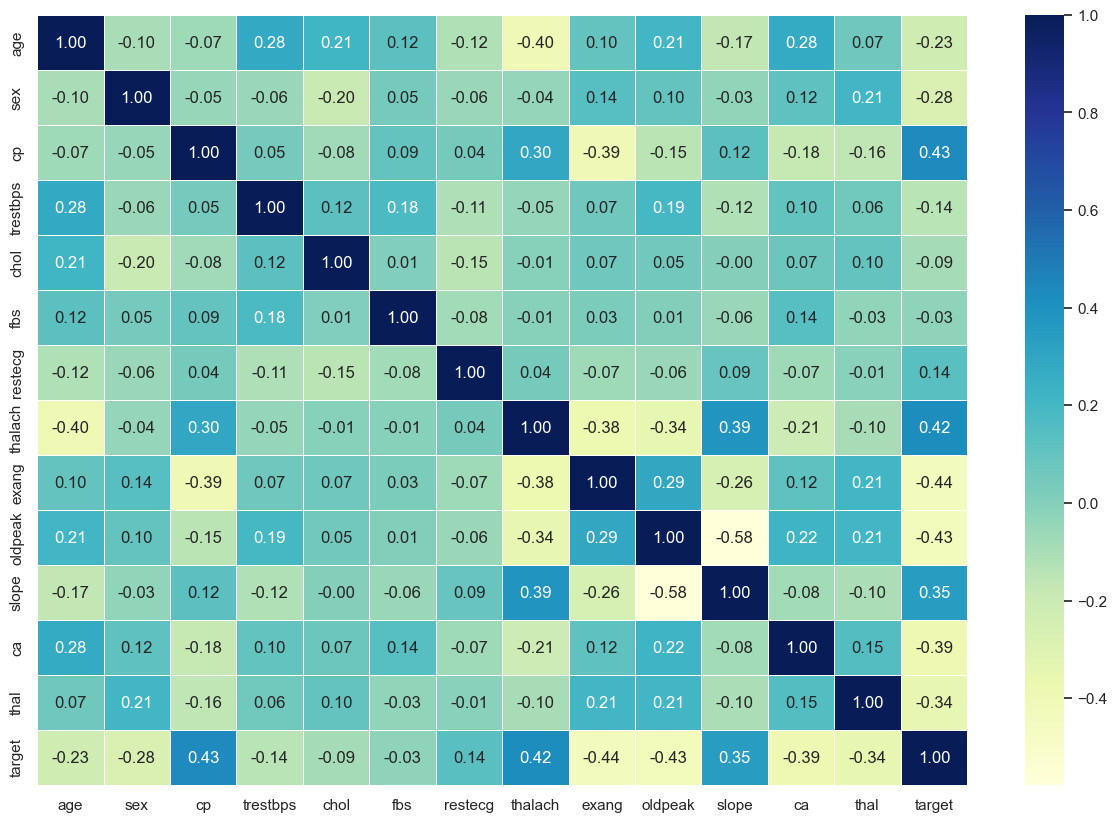

In [26]:
# Hagamos que nuestra matriz de correlación sea un poco más bonita
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelado

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Dividir los datos en X e y
y = df.target
X = df.drop(['target'], axis=1)

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
# Dividir los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora que nuestros datos están divididos en conjuntos de entrenamiento y prueba, es hora de construir un modelo de aprendizaje automático. 

Lo entrenaremos (encontraremos los patrones) en el conjunto de entrenamiento.

Lo probaremos (usando los patrones) en el conjunto de prueba. 

Probaremos tres modelos de aprendizaje automático diferentes:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [34]:
# Poner modelos en un diccionario
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Crear una función para ajustar y puntuar modelos
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Se ajusta y evalúa los modelos de aprendizaje automático dados.
    models : un diccionario de diferentes modelos de aprendizaje automático de Scikit-Learn
    X_train : datos de entrenamiento (sin etiquetas)
    X_test : datos de prueba (sin etiquetas)
    y_train : etiquetas de entrenamiento
    y_test : etiquetas de prueba
    """
    # Establecer semilla aleatoria
    np.random.seed(42)
    # Haz un diccionario para guardar las puntuaciones de los modelos
    model_scores = {}
    # Recorrer los modelos
    for name, model in models.items():
        # Ajustar el modelo a los datos
        model.fit(X_train, y_train)
        # Evalúe el modelo y agregue su puntuación a model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Comparación de modelos

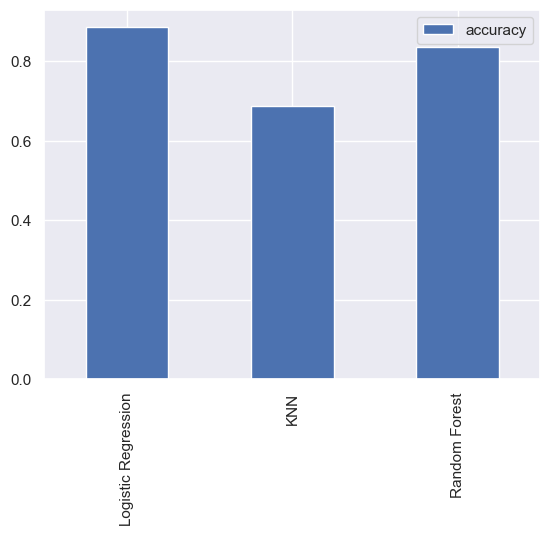

In [37]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Ahora tenemos un modelo base... y sabemos que las primeras predicciones de un modelo no siempre son las que deberíamos usar como base para nuestros próximos pasos. ¿Qué debemos hacer?

Veamos lo siguiente:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Ajuste de hiperparámetros (manualmente)

In [39]:
# Vamos a ajustar KNN

train_scores = []
test_scores = []

# Crear una lista de valores diferentes para n_neighbors
neighbors = range(1, 21)

# Configurar la instancia de KNN
knn = KNeighborsClassifier()

# Recorrer diferentes n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Ajustar el algoritmo
    knn.fit(X_train, y_train)
    
    # Actualizar la lista de puntuaciones de entrenamiento
    train_scores.append(knn.score(X_train, y_train))
    
    # Actualizar la lista de resultados de las pruebas
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [41]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


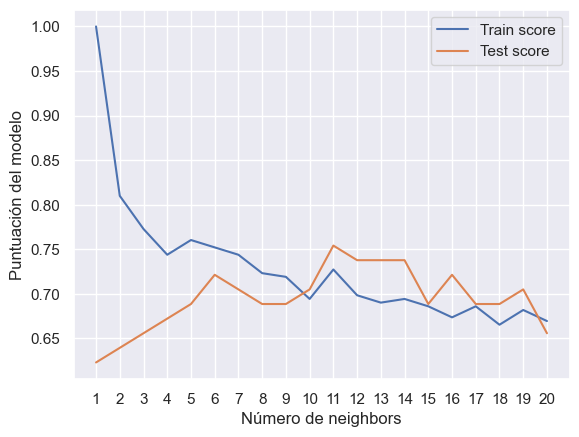

In [42]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Número de neighbors")
plt.ylabel("Puntuación del modelo")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Ajuste de hiperparámetros con RandomizedSearchCV

Vamos a ajustar:
* LogisticRegression()
* RandomForestClassifier()

... usando RandomizedSearchCV

In [44]:
# Crear una diccionario de hiperparámetros para LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

# Crear una diccionario de hiperparámetros para RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Ahora que tenemos configuradas las cuadrículas de hiperparámetros para cada uno de nuestros modelos, vamos a ajustarlas usando RandomizedSearchCV...

In [46]:
# Configurar semilla aleatoria
np.random.seed(42)

# Configurar la búsqueda aleatoria de hiperparámetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                n_jobs=-1)

# Ajuste del modelo de búsqueda de hiperparámetros aleatorios para LogisticRegression
best_model_log_reg = rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
best_model_log_reg

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
best_model_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [49]:
best_model_log_reg.score(X_test, y_test)

0.8852459016393442

Ahora que hemos ajustado LogisticRegression(), hagamos lo mismo para RandomForestClassifier()...

In [51]:
# Configurar semilla aleatoria
np.random.seed(42)

# Configurar la búsqueda aleatoria de hiperparámetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs=-1)

# Fit random hyperparameter search model for RandomForestClassifier()
best_model_rs_rf = rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [52]:
best_model_rs_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
# Encuentra los mejores hiperparámetros
best_model_rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [54]:
# Evaluar el modelo de búsqueda aleatoria RandomForestClassifier
best_model_rs_rf.score(X_test, y_test)

0.8524590163934426

## Ajuste de hiperparámetros con GridSearchCV

Dado que nuestro modelo de regresión logística proporciona los mejores puntajes hasta el momento, intentaremos mejorarlos nuevamente utilizando GridSearchCV

In [56]:
# Diferentes hiperparámetros para nuestro modelo de regresión logística
log_reg_grid = {"C": np.logspace(-4, 4, 25),
                "solver":["saga", "liblinear"],
                "penalty":["l1", "l2", "elasticnet", None],
                'dual':[True, False]}



# Configurar la búsqueda de hiperparámetros de cuadrícula para LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          n_jobs=-1, 
                          verbose=4,
                          cv=5)

# Ajustar el modelo de búsqueda de hiperparámetros de cuadrícula
best_model_gs_log_reg = gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1250 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    s

In [57]:
best_model_gs_log_reg

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['saga', 'liblinear']},
             verbose=4)

In [58]:
# Consulta los mejores hiperparámetros
best_model_gs_log_reg.best_params_

{'C': 0.21544346900318823,
 'dual': False,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [59]:
# Evaluar el modelo de regresión logística de GridSearchCV
best_model_gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluación de nuestro clasificador de aprendizaje automático optimizado, más allá de la precisión

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [61]:
# Hacer predicciones con un modelo ajustado
y_preds = best_model_gs_log_reg.predict(X_test)

In [62]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

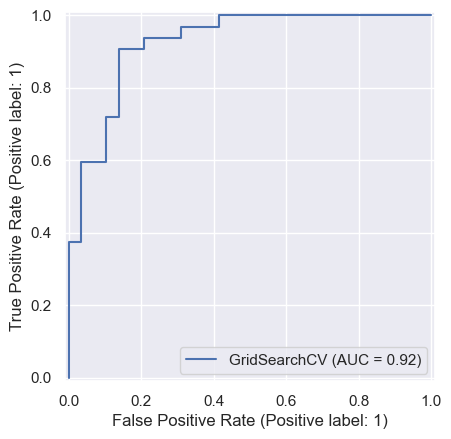

In [64]:
# Grafico la curva ROC y calculo la métrica AUC
RocCurveDisplay.from_estimator(best_model_gs_log_reg, X_test, y_test)

In [65]:
# Matriz de confusión
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


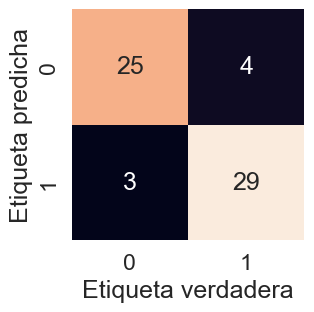

In [66]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Trazo una matriz de confusión de aspecto atractivo utilizando el mapa de calor de Seaborn()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Etiqueta verdadera")
    plt.ylabel("Etiqueta predicha")
  
plot_conf_mat(y_test, y_preds)

Ahora que tenemos una curva ROC, una métrica AUC y una matriz de confusión, obtengamos un informe de clasificación, así como precisión, recuperación y puntuación f1 validados de forma cruzada.

In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calcular métricas de evaluación mediante validación cruzada

Vamos a calcular la exactitud, precisión, recuperación y puntuación f1 de nuestro modelo mediante validación cruzada y para ello utilizaremos `cross_val_score()`.

In [70]:
# Verifico los mejores hiperparámetros
best_model_gs_log_reg.best_params_

{'C': 0.21544346900318823,
 'dual': False,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [71]:
# Creo un nuevo clasificador con los mejores parámetros
clf = LogisticRegression(C= 0.21544346900318823,
                         solver="liblinear")

In [72]:
# Validación cruzada accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy",
                         n_jobs=-1)
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [73]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [74]:
# Validación cruzada precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision",
                         n_jobs=-1)
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [75]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [76]:
# Validación cruzada recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall",
                         n_jobs=-1)
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [77]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [78]:
# Validación cruzada f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1",
                         n_jobs=-1)
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [79]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

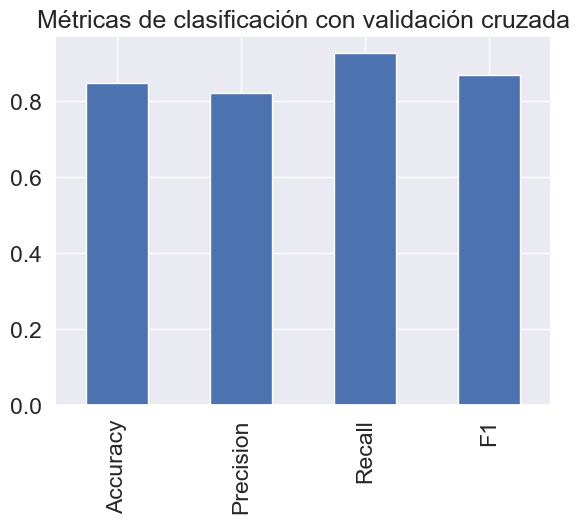

In [80]:
# Visualizar métricas validadas cruzadamente
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Métricas de clasificación con validación cruzada",
                      legend=False);

### Importancia de las características

La importancia de las características es otra cuestión, como preguntar "¿qué características contribuyeron más a los resultados del modelo y cómo contribuyeron?"

La determinación de la importancia de las características varía según el modelo de aprendizaje automático. Una forma de determinarla es buscar "(NOMBRE DEL MODELO) importancia de las características".

Encontremos la importancia de las características para nuestro modelo de regresión logística...

In [82]:
# Ajustar una instancia de LogisticRegression
clf = LogisticRegression(C=0.21544346900318823,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [83]:
# Verificar coef_
clf.coef_

array([[ 0.00338563, -0.87877752,  0.66637152, -0.01158157, -0.00168136,
         0.0458426 ,  0.32070146,  0.02465441, -0.61531468, -0.57143675,
         0.45870433, -0.64202465, -0.68502377]])

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
# Coincidir con los coeficientes de las características en las columnas
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0033856260026692737,
 'sex': -0.8787775236792102,
 'cp': 0.6663715183595131,
 'trestbps': -0.011581569025098236,
 'chol': -0.001681363767818216,
 'fbs': 0.045842604422428934,
 'restecg': 0.32070146179542663,
 'thalach': 0.02465440701109049,
 'exang': -0.615314682776689,
 'oldpeak': -0.5714367464657565,
 'slope': 0.4587043324318333,
 'ca': -0.6420246494591672,
 'thal': -0.685023774963562}

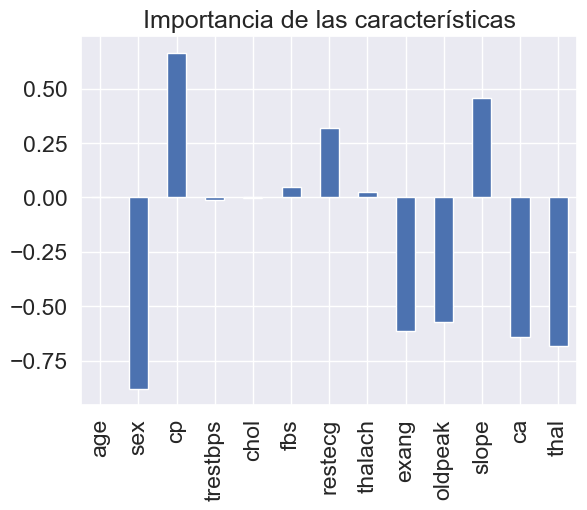

In [86]:
# Visualizar la importancia de las características
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Importancia de las características", legend=False);

In [87]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [88]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: la pendiente del segmento ST del ejercicio máximo

    * 0: Pendiente ascendente: mejor frecuencia cardíaca con el ejercicio (poco común)
    * 1: Pendiente plana: cambio mínimo (corazón sano típico)
    * 2: Pendiente descendente: signos de corazón no sano

## 6. Resumen

En este proyecto, se desarrolló un modelo de Regresión Logística optimizado mediante RandomizedSearchCV y GridSearchCV para la clasificación de enfermedades cardíacas. Se evaluó el rendimiento del modelo utilizando validación cruzada y métricas de desempeño clave como accuracy, recall, precisión y F1-score.

### Resultados

Los resultados fueron bastante buenos:

    - Accuracy: 84.80% : El modelo acierta en la mayoría de los casos.
    - Precisión: 82.16% : Acierta los casos positivos correctamente identificados.
    - Recall: 92.73% : Detecta a la mayoría de los pacientes con enfermedad sean identificados correctamente.
    - F1-score: 87.05% : Buen equilibrio entre precisión y recall.

La matriz de confusión mostró 3 falsos negativos (enfermos clasificados como sanos) y 4 falsos positivos (sanos clasificados como enfermos); es decir, el modelo prioriza encontrar enfermos, lo cual es ideal en aplicaciones médicas.

### ¿Qué se podría mejorar?

* Probar otros modelos como CatBoost o XGBoost.
* Afinar más los hiperparámetros para mejorar la precisión.
* Analizar mejor las características para usar solo las más importantes.
* Ajustar el umbral de clasificación para minimizar errores críticos.

### Conclusión
El modelo tiene buen desempeño y es una herramienta útil para predecir enfermedades cardíacas. Sin embargo, aún hay margen de mejora... ¡seguir experimentando podría hacer que los resultados sean aún mejores! 